In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
sns.set(rc={'figure.figsize':(9, 6)})

In [6]:
events_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/event_data_train.zip")

In [32]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [9]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [10]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [11]:
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [12]:
events_data['day'] = events_data.date.dt.date

In [13]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<AxesSubplot:>

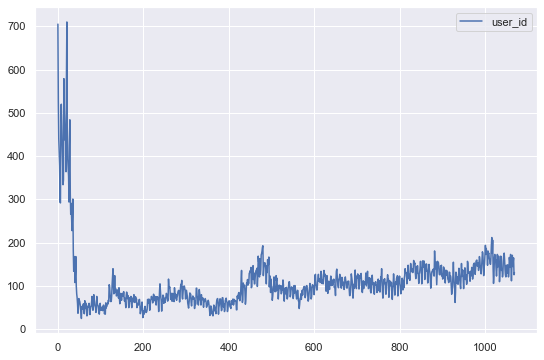

In [19]:
events_data.groupby('day', as_index = False)\
    .user_id.nunique().plot()

<AxesSubplot:>

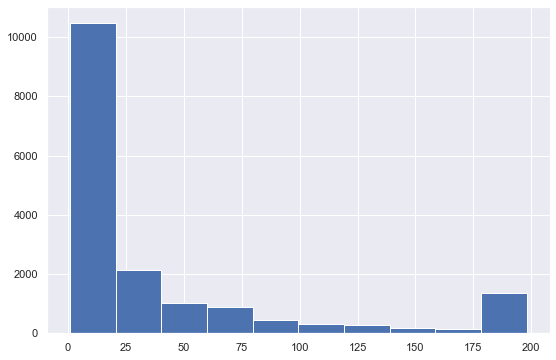

In [26]:
events_data[events_data.action == 'passed']\
.groupby('user_id', as_index =False)\
.agg({'step_id':'count'})\
.rename(columns={'step_id':'passed_steps'})\
.passed_steps.hist()

<AxesSubplot:>

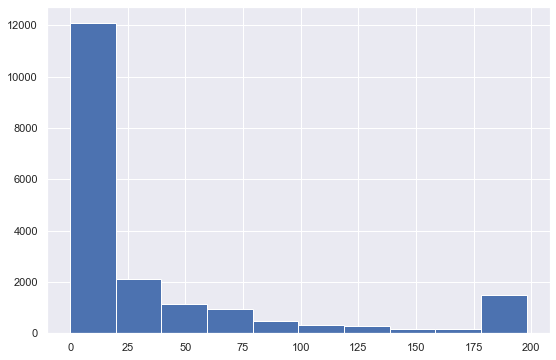

In [31]:
events_data.pivot_table(index = 'user_id',
                        columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0)\
.discovered.hist()

In [77]:
users_events_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action', values = 'step_id', aggfunc = 'count', fill_value = 0).reset_index()

In [36]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date

In [37]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [39]:
users_scores = submissions_data.pivot_table(index = 'user_id',
                        columns = 'submission_status', values = 'step_id', aggfunc = 'count', fill_value = 0)\
                        .reset_index()

In [40]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [48]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [52]:
 gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [54]:
gap_data = gap_data / (24 * 60 * 60) 

<AxesSubplot:>

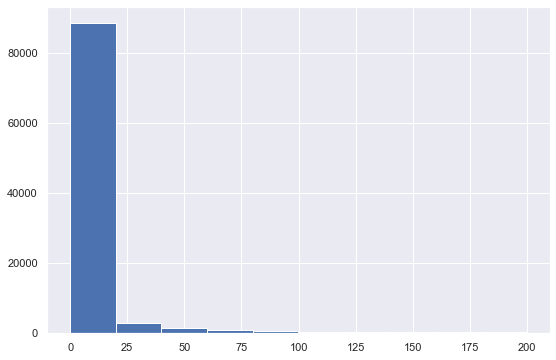

In [55]:
gap_data[gap_data < 200].hist()

In [56]:
gap_data.quantile(0.95)

59.760440972222156

In [57]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [62]:
users_data = events_data.groupby('user_id', as_index = False)\
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [65]:
now = 1526772811
drop_out_treshold = 2592000

In [67]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold

In [73]:
users_data = users_data.merge(users_scores, on ='user_id', how = 'outer')

In [74]:
users_data = users_data.fillna(0)

In [75]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [78]:
users_data = users_data.merge(users_events_data, how = 'outer')

In [80]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [85]:
user_days = events_data.groupby('user_id', as_index = False).day.nunique()

In [87]:
user_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [89]:
users_data = users_data.merge(user_days, how = 'outer')

In [90]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [91]:
users_data['passed_course'] = users_data.passed > 170 